In [1]:
from dataloader import readChoirData

In [2]:
train = readChoirData(dir='../mnist/',data_path='mnist',data_type='train')

In [156]:
test = readChoirData(dir='../mnist/',data_path='mnist',data_type='test')

In [211]:
import torch
import numpy as np

class Image_HDC_Model ( object ) :
    def __init__(self,dimension,method,input_features=(28,28),probability_distribution='Gaussian',classes= 10):
        '''Hyperdimensional classification module . Arguments :
            * dimension ( int , > 0) : The dimensionality of the high dimensional representation .
            * Method : 'axis' , 'pixel'
            * probability_distribution ( string ) : Probability distribution being used .←-
                For now , it can be Uniform , Gaussian , or Laplacian .
        '''
        self.dimension = dimension
        self.probability_distribution = probability_distribution
        self.class_hypervector = torch.zeros((classes,dimension))
        self.input_features = input_features
        self.method = method  
        self.cos = torch.nn.CosineSimilarity()
        if method == 'pixel':
            self.pixel_hypervector = self.generate_pixelbasis()
            self.encode = self.pixel_encoding
        elif method == 'axis':
            self.axis_hypervector_x, self.axis_hypervector_y = self.generate_axisbasis()
            self.encode = self.axis_encoding
        
    def generate_pixelbasis(self):
        size = (self.input_features[0]*self.input_features[1],self.dimension)
        if self.probability_distribution == 'Uniform':
            return np.array(torch.empty(size).uniform_(-1,1))
    
        elif self.probability_distribution == 'Gaussian':
            return np.random.normal(0,1,size)
        
        elif self.probability_distribution == 'Laplacian':
             return np.random.laplace(0,1,size=size)
        else:
            raise "Probability distribution error"
        
    def generate_axisbasis(self):
        # generating hypervectors for each x-axis (x-dimension shape), y-axis (y-dimension shape)
        size = (self.input_features[0],self.dimension)
        if self.probability_distribution == 'Uniform':
            return (np.array(torch.empty(size).uniform_(-1,1)),np.array(torch.empty(size).uniform_(-1,1))) 
    
        elif self.probability_distribution == 'Gaussian':
            return (np.random.normal(0,1,size), np.random.normal(0,1,size))
        
        elif self.probability_distribution == 'Laplacian':
             return (np.random.normal(0,1,size), np.random.normal(0,1,size))
        else:
            raise "Probability distribution error"        
        
    def pixel_encoding(self,image):
        # Each image pixel has each hv, therefore, it is multiplied with each hv 
        input_image = torch.Tensor(image)
        encoded_hv  = torch.matmul(input_image, torch.Tensor(self.pixel_hypervector))
        return torch.tanh(encoded_hv)
    
    def axis_encoding(self,image):
        # each image pixel is multiplied by each x-axis's hv and y-axis's hv of its position 
        input_image = image.reshape(self.input_features) # reshape the image for the position 
        encoded_hv = np.sum(input_image[:, :, np.newaxis] * self.axis_hypervector_x[:, np.newaxis, :] * self.axis_hypervector_y[np.newaxis, :, :], axis=(0, 1))
        return torch.tanh(torch.Tensor(encoded_hv))
    

    def train(self,train_data):
        i = 0
        for x,y in train_data:
            if i % 10000 ==  0:
                print(i)
            self.class_hypervector[y] += self.encode(x)
            i += 1  
    
    def predict(self,data:torch.Tensor):
        given_d = self.encode(data)
        return np.argmax(self.cos(self.class_hypervector,given_d))
    

In [212]:
def test_model(model,test_data):
    corr = 0
    for data,label in zip(test_data['data'],test_data['labels']):
        if model.predict(data) == label:
            corr += 1 
    acc  = corr / len(test_data["data"])
    print (f"Accuracy {acc}")
    return acc

In [214]:
acc_axis = {}
for dim in [256,512,4096,10000]:
    for pb in ['Gaussian','Laplacian','Uniform']:
        imghdc = Image_HDC_Model(dimension = dim, method = 'axis',probability_distribution=pb)
        imghdc.train(zip(train['data'],train['labels']))
        acc_axis[(dim,pb)] = test_model(imghdc,test)

0
10000
20000
30000
40000
50000
Accuracy 0.7785
0
10000
20000
30000
40000
50000
Accuracy 0.8041
0
10000
20000
30000
40000
50000
Accuracy 0.7978
0
10000
20000
30000
40000
50000
Accuracy 0.8082
0
10000
20000
30000
40000
50000
Accuracy 0.8174
0
10000
20000
30000
40000
50000
Accuracy 0.8114
0
10000
20000
30000
40000
50000
Accuracy 0.823
0
10000
20000
30000
40000
50000
Accuracy 0.8195
0
10000
20000
30000
40000
50000
Accuracy 0.8217
0
10000
20000
30000
40000
50000
Accuracy 0.825
0
10000
20000
30000
40000
50000
Accuracy 0.8254
0
10000
20000
30000
40000
50000
Accuracy 0.8193


In [237]:
import pandas as pd
result_df_axis = pd.DataFrame(columns= ['dim','prob','acc'])
for k in acc_axis:
    result_df_axis = result_df_axis.append({'dim':k[0],'prob':k[1],'acc':acc_axis[k]},ignore_index=True )

result_df_axis.to_csv('./imge_hdc_axis_result.csv')

In [228]:
acc_pixel = {}
for dim in [256,512,4096,10000]:
    for pb in ['Gaussian','Laplacian','Uniform']:
        imghdc = Image_HDC_Model(dimension = dim, method = 'pixel',probability_distribution=pb)
        imghdc.train(zip(train['data'],train['labels']))
        acc_pixel[(dim,pb)] = test_model(imghdc,test)

0
10000
20000
30000
40000
50000
Accuracy 0.7938
0
10000
20000
30000
40000
50000
Accuracy 0.8004
0
10000
20000
30000
40000
50000
Accuracy 0.8089
0
10000
20000
30000
40000
50000
Accuracy 0.8176
0
10000
20000
30000
40000
50000
Accuracy 0.8074
0
10000
20000
30000
40000
50000
Accuracy 0.8051
0
10000
20000
30000
40000
50000
Accuracy 0.8238
0
10000
20000
30000
40000
50000
Accuracy 0.8243
0
10000
20000
30000
40000
50000
Accuracy 0.8229
0
10000
20000
30000
40000
50000
Accuracy 0.8235
0
10000
20000
30000
40000
50000
Accuracy 0.8245
0
10000
20000
30000
40000
50000
Accuracy 0.8219


In [248]:
import pandas as pd
result_df_pixel = pd.DataFrame(columns= ['dim','prob','acc'])
for k in acc_pixel:
    result_df_pixel = result_df_pixel.append({'dim':k[0],'prob':k[1],'acc':acc_pixel[k]},ignore_index=True )

In [249]:
result_df_pixel.to_csv('./imge_hdc_pixel_result.csv')

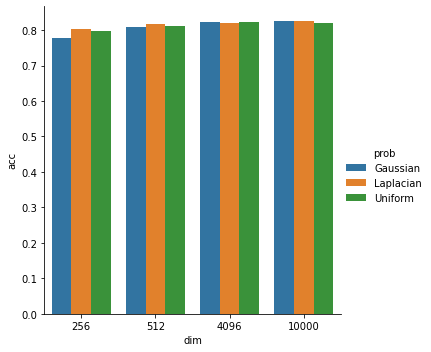

In [250]:
import seaborn as sns


sns.catplot(x = "dim",       # x variable name
            y = "acc",       # y variable name
            hue = "prob",  # group variable name
            data = result_df_axis,     # dataframe to plot
            kind = "bar")

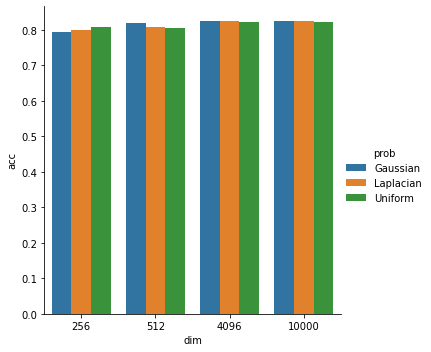

In [251]:
sns.catplot(x = "dim",       # x variable name
            y = "acc",       # y variable name
            hue = "prob",  # group variable name
            data = result_df_pixel,     # dataframe to plot
            kind = "bar")

In [262]:
result_all_df = result_df_pixel.merge(result_df_axis,on=['prob','dim'],suffixes=('_pixel', '_axis'))

In [263]:
result_all_df

,dim,prob,acc_pixel,acc_axis
0,256,Gaussian,0.7938,0.7785
1,256,Laplacian,0.8004,0.8041
2,256,Uniform,0.8089,0.7978
3,512,Gaussian,0.8176,0.8082
4,512,Laplacian,0.8074,0.8174
5,512,Uniform,0.8051,0.8114
6,4096,Gaussian,0.8238,0.8230
7,4096,Laplacian,0.8243,0.8195
8,4096,Uniform,0.8229,0.8217
9,10000,Gaussian,0.8235,0.8250
